# 09-1 순환신경망

## 순차 데이터


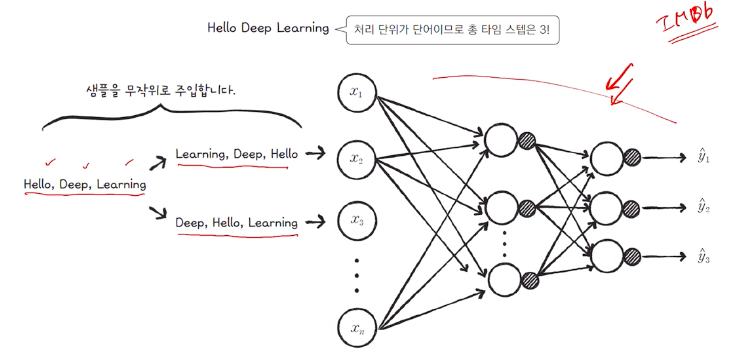

완전연결신경망 구조에서는 순차데이터를 다루기 어려움.(랜덤데이터를 주로 다룬다)

순차데이터는 순서에 의미가 있기 때문에 순서를 뒤섞어서 보내면 원하는 문제를 못푼다.

순환신경망은 순차데이터를 다루기 적합함

순차데이터는 현재 입력하는 데이터 앞에 어떤 데이터가 들어왔었는지 신경망에 정보가 남아있으면 (기억하고있으면) 더 의미있는 예측을 할 수 있음



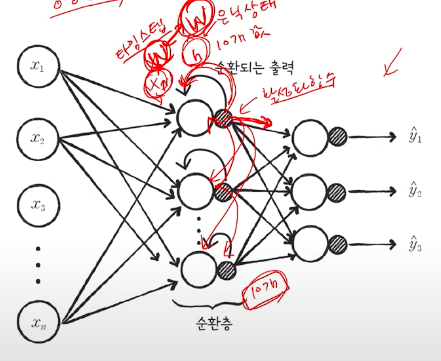

위 그림처럼 활성화함수를 통과한 결과값이 넘어가는것 뿐만 아니라 자기자신에게 다시 사용되면 (순환) 이전의 출력값 h도 같이 사용되어 다음번 출력을 만들때 함께 사용됨 = 은닉상태

다음번 '타임스텝'에 데이터가 전해졌을때 이전의 은닉상태와 함께 계산되는 것

x에 어떠한 가중치가 곱해져 뉴런에 출력하듯이 은닉상태 h 또한 가중치가 곱해짐 (둘의 가중치는 서로 다름)

은닉상태의 w와 입력 x 의 w 를 학습하는 것이 순환 신경망의 기본 작동 원리



##순환 셀

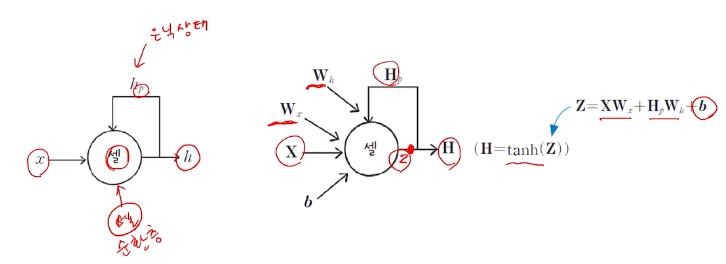

순환층을 셀이라고 표현, 은닉상태는 h 이전의 은닉상태는 hp로 표현

셀에서는 x와 가중치 Wx가 곱해지고, hp와 가중치 Wh가 곱해지고 절편 b가 더해짐

## 정방향 계산

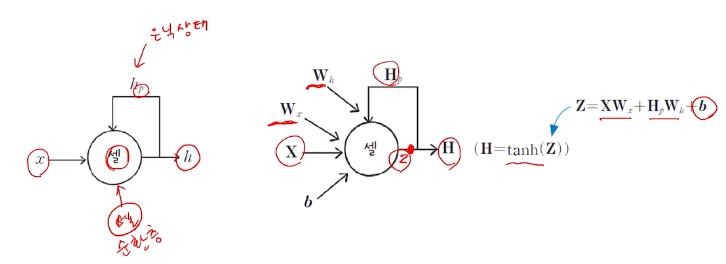

출력층의 활성화함수는 시그모이드이고 로지스틱로스 사용



## 역방향 계산

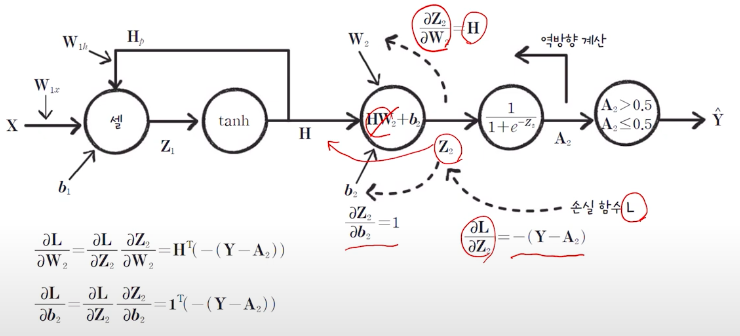

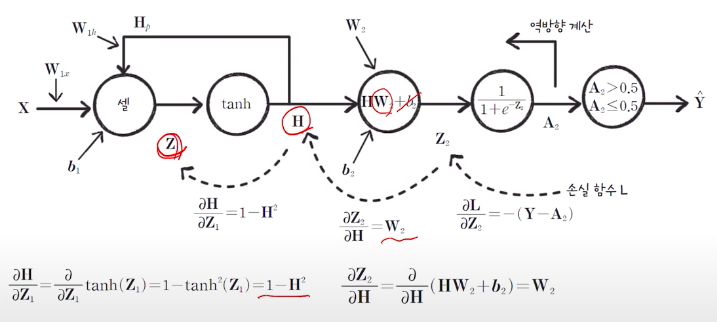

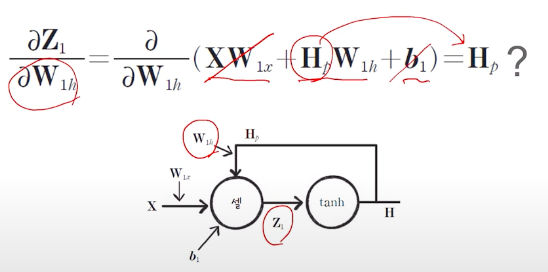

## 타임스텝을 거슬러 역전파

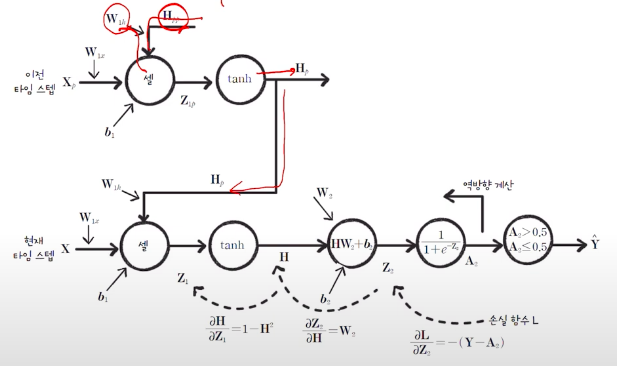

Hp도 이전 타임스텝에서 계산될 때 W1h를 사용했기 때문에 상수 취급 불가, 미분해줘야함.

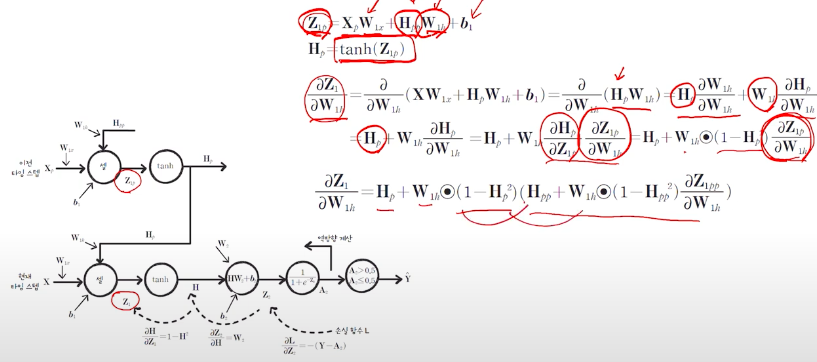

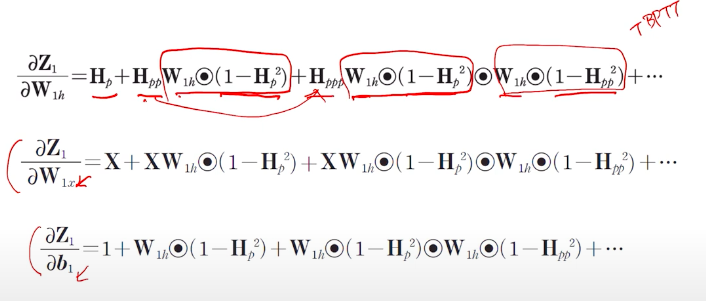

## 09-2 순환 신경망을 만들고 텍스트를 분류합니다

In [1]:
#데이터로드
import numpy as np
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

앞의 20개는 너무 많이 등장한 단어여서 그냥 스킵(조사, 관사 등 의미없음) 단어는 100개 사용해봄

In [2]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [4]:
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
word_to_index = imdb.get_word_index()

word_to_index['movie']

1646592/1641221 [==============================] - 0s 0us/step


17

In [6]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w - 3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [7]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [8]:
#샘플 길이 맞추기 원-핫 인코딩하기
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

왼쪽부터 0으로 채운다 마지막 주입 데이터가 효과가 클텐데 뒤쪽에 0이 있으면 효과가 좋지 않음

은닉상태의 단어가 기록에 남을텐데 타임스텝이 길어질수록 기억정보가 흐려지기 때문에 뒤쪽 단어가 더 강한 역할을 할 확률이 높다. 그렇기에 패딩은 왼쪽에 채움

In [9]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [10]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [11]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [12]:
import tensorflow as tf

In [13]:
class RecurrentNetwork:
    
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells     # 셀 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1h = None            # 은닉 상태에 대한 가중치
        self.w1x = None            # 입력에 대한 가중치
        self.b1 = None             # 순환층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.h = None              # 순환층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   # 은닉 상태를 초기화합니다.
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        # 순환 층의 선형 식을 계산합니다.
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    # 활성화 함수를 적용합니다.
            self.h.append(h)                   # 역전파를 위해 은닉 상태 저장합니다.
            z2 = np.dot(h, self.w2) + self.b2  # 출력층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        
        w1h_grad = w1x_grad = b1_grad = 0
        # 셀 직전까지 그래디언트를 계산합니다.
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 모든 타임 스텝을 거슬러가면서 그래디언트를 전파합니다.
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # 이전 타임 스텝의 셀 직전까지 그래디언트를 계산합니다.
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
        
        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m
    
        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)                           # 은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   # (셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 셀의 가중치와 절편을 업데이트합니다.
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return z > 0                 # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

In [14]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

In [15]:
import matplotlib.pyplot as plt

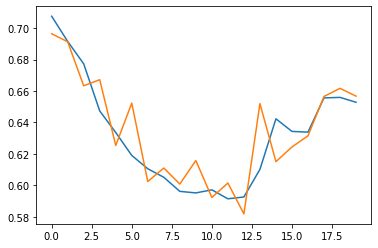

In [16]:
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [17]:
rn.score(x_val_onehot, y_val)

0.5934

##09-3 텐서플로로 순환 신경망 만들기

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [19]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, 
                    validation_data=(x_val_onehot, y_val))


Epoch 1/20
625/625 [==============================] - 12s 17ms/step - loss: 0.7072 - accuracy: 0.4982 - val_loss: 0.6955 - val_accuracy: 0.5042
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6947 - accuracy: 0.5085 - val_loss: 0.6938 - val_accuracy: 0.5116
Epoch 3/20
625/625 [==============================] - 10s 17ms/step - loss: 0.6917 - accuracy: 0.5182 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 4/20
625/625 [==============================] - 10s 17ms/step - loss: 0.6887 - accuracy: 0.5320 - val_loss: 0.6885 - val_accuracy: 0.5426
Epoch 5/20
625/625 [==============================] - 10s 17ms/step - loss: 0.6839 - accuracy: 0.5523 - val_loss: 0.6784 - val_accuracy: 0.5668
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6695 - accuracy: 0.5851 - val_loss: 0.6637 - val_accuracy: 0.6018
Epoch 7/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6441 - accuracy: 0.6311 - val_loss: 0.6240 - val_accuracy:

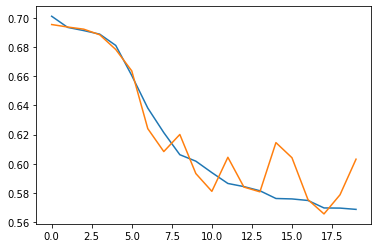

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

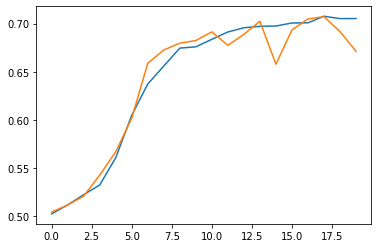

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [24]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

0.6711999773979187


In [25]:
from tensorflow.keras.layers import Embedding

In [26]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [27]:
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [28]:
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                        validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 11s 16ms/step - loss: 0.5428 - accuracy: 0.7334 - val_loss: 0.4215 - val_accuracy: 0.8208
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3746 - accuracy: 0.8453 - val_loss: 0.4173 - val_accuracy: 0.8102
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3483 - accuracy: 0.8585 - val_loss: 0.4060 - val_accuracy: 0.8216
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3153 - accuracy: 0.8713 - val_loss: 0.4124 - val_accuracy: 0.8318
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2817 - accuracy: 0.8902 - val_loss: 0.4176 - val_accuracy: 0.8212
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2631 - accuracy: 0.9001 - val_loss: 0.4470 - val_accuracy: 0.8242
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2464 - accuracy: 0.9049 - val_loss: 0.4496 - val_accuracy:

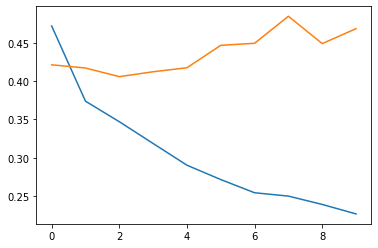

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

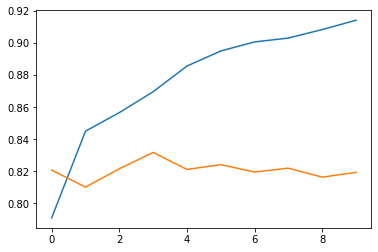

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [32]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)


0.8194000124931335


##09-4 순환신경망으로 텍스트 분류하기

In [33]:
from tensorflow.keras.layers import LSTM

In [34]:
model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))


Epoch 1/10
625/625 [==============================] - 18s 27ms/step - loss: 0.5618 - accuracy: 0.7208 - val_loss: 0.3719 - val_accuracy: 0.8388
Epoch 2/10
625/625 [==============================] - 16s 25ms/step - loss: 0.3255 - accuracy: 0.8671 - val_loss: 0.3526 - val_accuracy: 0.8490
Epoch 3/10
625/625 [==============================] - 15s 25ms/step - loss: 0.2968 - accuracy: 0.8779 - val_loss: 0.3488 - val_accuracy: 0.8432
Epoch 4/10
625/625 [==============================] - 15s 25ms/step - loss: 0.2792 - accuracy: 0.8851 - val_loss: 0.3586 - val_accuracy: 0.8448
Epoch 5/10
625/625 [==============================] - 15s 25ms/step - loss: 0.2605 - accuracy: 0.8911 - val_loss: 0.3724 - val_accuracy: 0.8378
Epoch 6/10
625/625 [==============================] - 15s 25ms/step - loss: 0.2463 - accuracy: 0.9010 - val_loss: 0.3660 - val_accuracy: 0.8358
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2347 - accuracy: 0.9066 - val_loss: 0.3976 - val_accuracy:

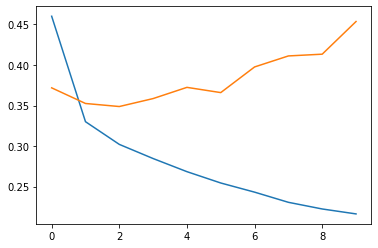

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

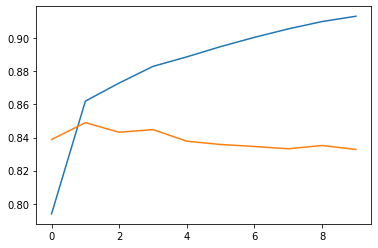

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [38]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8327999711036682
